# Titanic Kaggle Competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

## Analysis of the Titanic Training Data and Preprocessing

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
display(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We will drop the features: Name, Ticket and Cabin. Cabin appears to have a lot of missing values which will make it difficult to use. Name and Ticket are also difficult to use.

In [5]:
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Applying One hot encoding for Embarked and encoding Sex to -1 (male) and 1 (female)

In [7]:
# One hot encoding for Embarked
train = pd.get_dummies(train, columns=['Embarked'], dtype=np.int64)

# Label Sex as -1 and 1 for male and female
train['Sex'].replace({'male': -1, 'female': 1}, inplace=True)

train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    int64  
 8   Embarked_Q  891 non-null    int64  
 9   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.6 KB


In [8]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,-1,22.0,1,0,7.2500,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0
3,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,3,-1,35.0,0,0,8.0500,0,0,1


In [9]:
# Scale the data
scaler = StandardScaler()
Scaled = scaler.fit_transform(X)
X = pd.DataFrame(Scaled, columns=X.columns, index=X.index)
X.describe()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02
mean,-8.772133e-17,3.987333e-17,2.388379e-16,4.386066e-17,5.382900e-17,3.987333e-18,-1.993666e-17,0.000000,-4.984166e-17
std,1.000562e+00,1.000562e+00,1.000701e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562,1.000562e+00
min,-1.566107e+00,-7.376951e-01,-2.016979e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-4.820427e-01,-0.307562,-1.614710e+00
25%,-3.693648e-01,-7.376951e-01,-6.595416e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-4.820427e-01,-0.307562,-1.614710e+00
50%,8.273772e-01,-7.376951e-01,-1.170488e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-4.820427e-01,-0.307562,6.193064e-01
75%,8.273772e-01,1.355574e+00,5.718310e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-4.820427e-01,-0.307562,6.193064e-01
max,8.273772e-01,1.355574e+00,3.465126e+00,6.784163e+00,6.974147e+00,9.667167e+00,2.074505e+00,3.251373,6.193064e-01


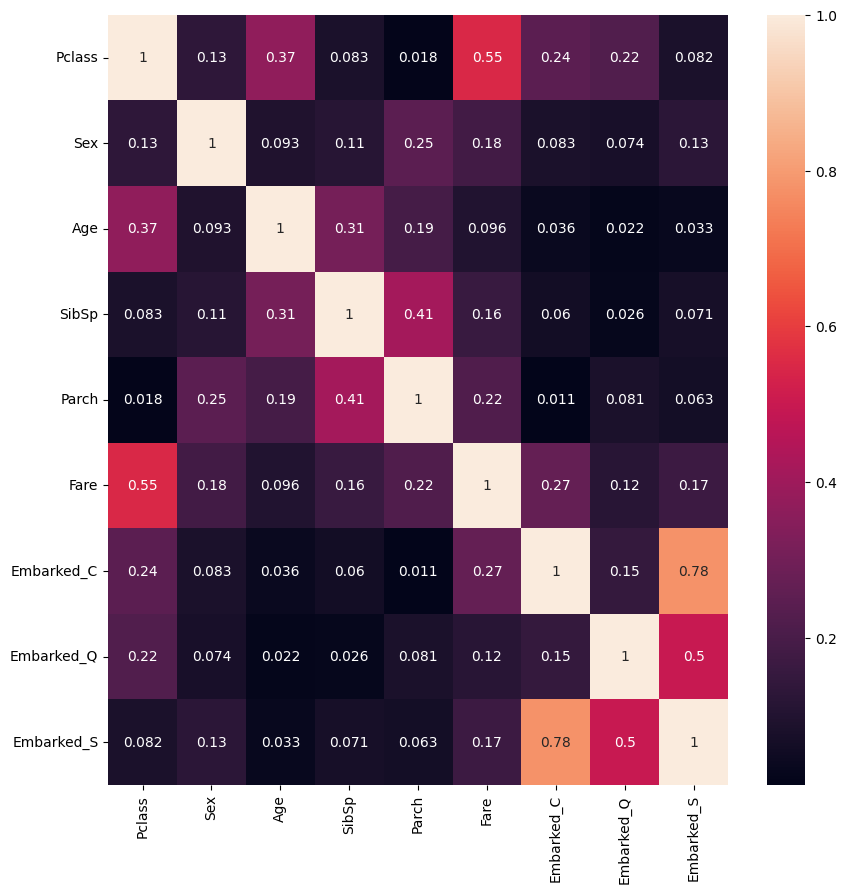

In [10]:
# Display the correlation heatmap (absolute values)
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr().abs(), annot=True)
plt.show()



## Predicting missing age values
Since Age has missing values, we will try to fit a model to predict the age. Since Pclass and Parch seem to have some correlation with Age, we will use these as our features, we will also check to see if simply using the mean and median of the age is a better predictor as well as using the mean and median of the age for each Pclass.

In [11]:
# Get X_age and y_age
age = X[X['Age'].notnull()]
# select Pclass, Parch and SibSp as features
X_age = age[['Pclass', 'Parch', 'SibSp']]
y_age = age['Age']

# Split the data
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

In [12]:
# Train Linear Regression model and perform hyperparameter tuning with GridSearchCV
age_model_1 = LinearRegression()

param_grid = {'fit_intercept': [True, False]}

age_model_1_cv = GridSearchCV(age_model_1, param_grid, cv=5)
age_model_1_cv.fit(X_age_train, y_age_train)

print("Tuned Linear Regression Parameters: {}".format(age_model_1_cv.best_params_))
print("Best score is {}".format(age_model_1_cv.best_score_))

Tuned Linear Regression Parameters: {'fit_intercept': False}
Best score is 0.18690690395442294


In [13]:
# Train Random Forest model and perform hyperparameter tuning with GridSearchCV
age_model_2 = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

age_model_2_cv = GridSearchCV(age_model_2, param_grid, cv=5)
age_model_2_cv.fit(X_age_train, y_age_train)

print("Tuned Random Forest Parameters: {}".format(age_model_2_cv.best_params_))
print("Best score is {}".format(age_model_2_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': 4, 'n_estimators': 50}
Best score is 0.267538560609417


In [14]:
# Train Linear Regression model and with best parameters
age_model_1 = LinearRegression(fit_intercept=True)
age_model_1.fit(X_age_train, y_age_train)

# Predict the test set
age_pred = age_model_1.predict(X_age_test)

# Calculate the RMSE
age_rmse = np.sqrt(mean_squared_error(y_age_test, age_pred))
print('Linear Regression RMSE: {}'.format(age_rmse))


Linear Regression RMSE: 0.8018483174352822


In [15]:
# Train Random Forest model and with best parameters
age_model_2 = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=42)
age_model_2.fit(X_age_train, y_age_train)

# Predict the test set
age_pred = age_model_2.predict(X_age_test)

# Calculate the RMSE
age_rmse = np.sqrt(mean_squared_error(y_age_test, age_pred))
print('Random Forest RMSE: {}'.format(age_rmse))


Random Forest RMSE: 0.7732332956303559


In [16]:
# Score if we had just used the mean
mean_age = y_age_train.mean()
y_age_pred = np.full(y_age_test.shape, mean_age)

print('RMSE: ', np.sqrt(mean_squared_error(y_age_test, y_age_pred)))


RMSE:  0.9443492516491854


In [17]:
# Score if we had just used the median
median_age = y_age_train.median()
y_age_pred = np.full(y_age_test.shape, median_age)

print('RMSE: ', np.sqrt(mean_squared_error(y_age_test, y_age_pred)))

RMSE:  0.9380131883068772


In [18]:
# Score if we had used the mean for each Pclass
pclass_means = y_age_train.groupby(X_age_train['Pclass']).mean()
y_age_pred = X_age_test['Pclass'].map(pclass_means)

print('RMSE: ', np.sqrt(mean_squared_error(y_age_test, y_age_pred)))

RMSE:  0.8750275995287342


In [19]:
# Score if we had used the median for each Pclass
pclass_medians = y_age_train.groupby(X_age_train['Pclass']).median()
y_age_pred = X_age_test['Pclass'].map(pclass_medians)

print('RMSE: ', np.sqrt(mean_squared_error(y_age_test, y_age_pred)))

RMSE:  0.8693746849880378


The random forest model with hyperparameters `n_estimators=50, max_depth=4` seems to be the best model for predicting the age. We will use this model to predict the missing age values.

In [20]:
# Train random forest model on all data
age_model = age_model_2.fit(X_age, y_age)

# Predict missing ages
missing_age = X[X['Age'].isnull()]
X_missing_age = missing_age[['Pclass', 'Parch', 'SibSp']]
y_missing_age = age_model.predict(X_missing_age)

# Replace missing ages with predicted ages
X.loc[X['Age'].isnull(), 'Age'] = y_missing_age

In [21]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02
mean,-8.772133e-17,3.987333e-17,-0.014752,4.386066e-17,5.382900e-17,3.987333e-18,-1.993666e-17,0.000000,-4.984166e-17
std,1.000562e+00,1.000562e+00,0.923889,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562,1.000562e+00
min,-1.566107e+00,-7.376951e-01,-2.016979,-4.745452e-01,-4.736736e-01,-6.484217e-01,-4.820427e-01,-0.307562,-1.614710e+00
25%,-3.693648e-01,-7.376951e-01,-0.564821,-4.745452e-01,-4.736736e-01,-4.891482e-01,-4.820427e-01,-0.307562,-1.614710e+00
50%,8.273772e-01,-7.376951e-01,-0.118068,-4.745452e-01,-4.736736e-01,-3.573909e-01,-4.820427e-01,-0.307562,6.193064e-01
75%,8.273772e-01,1.355574e+00,0.502943,4.327934e-01,-4.736736e-01,-2.424635e-02,-4.820427e-01,-0.307562,6.193064e-01
max,8.273772e-01,1.355574e+00,3.465126,6.784163e+00,6.974147e+00,9.667167e+00,2.074505e+00,3.251373,6.193064e-01


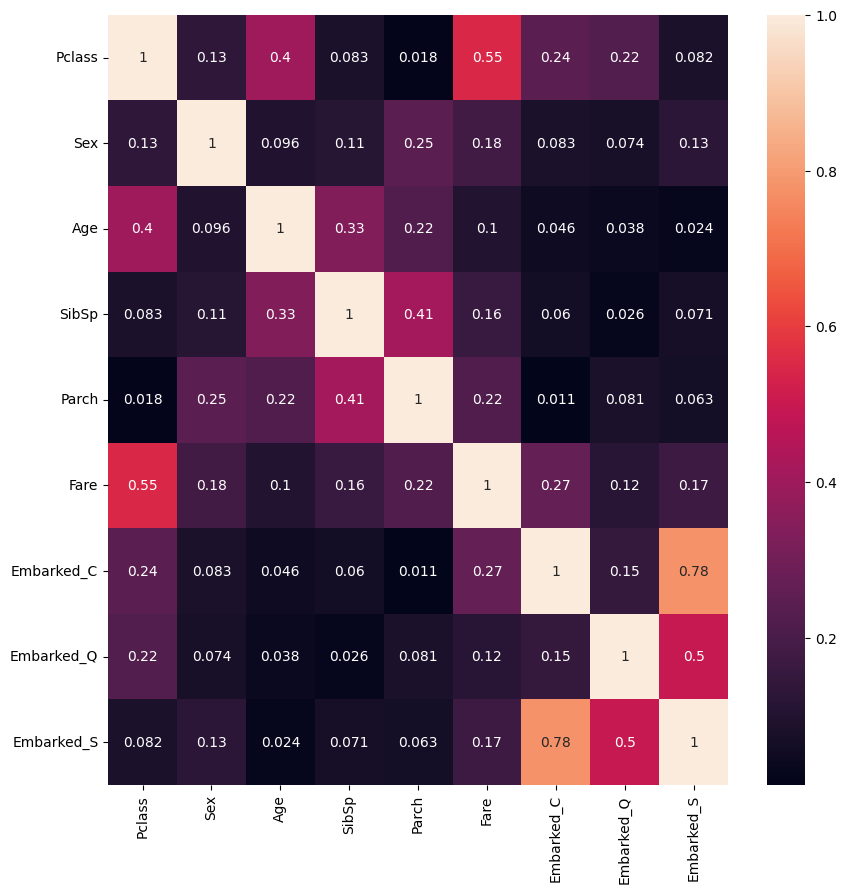

In [22]:
# Display the correlation heatmap (absolute values)
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr().abs(), annot=True)
plt.show()

## Selecting model to predict survival
We will use the following models to predict survival and select the best model and tune the hyperparameters for the model.
* Logistic Regression 
* Random Forest
* Support Vector Machine (SVC and LinearSVC)
* K-Nearest Neighbors
* Naive Bayes

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Logistic Regression model and perform hyperparameter tuning with GridSearchCV
survival_model_1 = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

survival_model_1_cv = GridSearchCV(survival_model_1, param_grid, cv=5)

survival_model_1_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(survival_model_1_cv.best_params_))
print("Best score is {}".format(survival_model_1_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2'}
Best score is 0.7948980596867921


In [25]:
# Train Random Forest model and perform hyperparameter tuning with GridSearchCV
survival_model_2 = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

survival_model_2_cv = GridSearchCV(survival_model_2, param_grid, cv=5)

survival_model_2_cv.fit(X_train, y_train)

print("Tuned Random Forest Parameters: {}".format(survival_model_2_cv.best_params_))
print("Best score is {}".format(survival_model_2_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': 4, 'n_estimators': 100}
Best score is 0.4394287818861632


In [26]:
# Train SVC model and perform hyperparameter tuning with GridSearchCV
survival_model_3 = SVC(random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

survival_model_3_cv = GridSearchCV(survival_model_3, param_grid, cv=5)

survival_model_3_cv.fit(X_train, y_train)

print("Tuned SVC Parameters: {}".format(survival_model_3_cv.best_params_))
print("Best score is {}".format(survival_model_3_cv.best_score_))

Tuned SVC Parameters: {'C': 10, 'gamma': 0.1}
Best score is 0.8244459765586527


In [27]:
# Train KNN model and perform hyperparameter tuning with GridSearchCV
survival_model_4 = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                'weights': ['uniform', 'distance']}

survival_model_4_cv = GridSearchCV(survival_model_4, param_grid, cv=5)

survival_model_4_cv.fit(X_train, y_train)

print("Tuned KNN Parameters: {}".format(survival_model_4_cv.best_params_))
print("Best score is {}".format(survival_model_4_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 8, 'weights': 'uniform'}
Best score is 0.8201812272234807


In [28]:
# Train Naive Bayes model and perform hyperparameter tuning with GridSearchCV
survival_model_5 = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

survival_model_5_cv = GridSearchCV(survival_model_5, param_grid, cv=5)

survival_model_5_cv.fit(X_train, y_train)

print("Tuned Naive Bayes Parameters: {}".format(survival_model_5_cv.best_params_))
print("Best score is {}".format(survival_model_5_cv.best_score_))

Tuned Naive Bayes Parameters: {'var_smoothing': 0.2848035868435802}
Best score is 0.7836698512754852


In [29]:
# Train all models with best parameters and compare their scores on the test set
survival_model_1 = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
survival_model_1.fit(X_train, y_train)
print('Logistic Regression score: {}'.format(survival_model_1.score(X_test, y_test)))

survival_model_2 = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
survival_model_2.fit(X_train, y_train)
print('Random Forest score: {}'.format(survival_model_2.score(X_test, y_test)))

survival_model_3 = SVC(C=10, gamma=0.1, random_state=42)
survival_model_3.fit(X_train, y_train)
print('SVC score: {}'.format(survival_model_3.score(X_test, y_test)))

survival_model_5 = KNeighborsClassifier(n_neighbors=8, weights='uniform')
survival_model_5.fit(X_train, y_train)
print('KNN score: {}'.format(survival_model_5.score(X_test, y_test)))

survival_model_5 = GaussianNB(var_smoothing=0.2848035868435802)
survival_model_5.fit(X_train, y_train)
print('Naive Bayes score: {}'.format(survival_model_5.score(X_test, y_test)))

Logistic Regression score: 0.7932960893854749
Random Forest score: 0.4316248309780396
SVC score: 0.8212290502793296
KNN score: 0.8044692737430168
Naive Bayes score: 0.7877094972067039


The SVC appears to have the best score from among the models. We will use this model to predict the survival of the passengers. Let's see the confusion matrix and the classification report for the model.

In [30]:
# Display confusion matrix for SVC model
y_pred = survival_model_3.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[96,  9],
       [23, 51]])

In [31]:
# Display classification report for SVC model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Training the model over the entire dataset

In [32]:
survival_model = survival_model_3.fit(X, y)

## Generating the predictions for the test set

In [33]:
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')
display(test.head())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [35]:
test.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [36]:
# Apply the same transformations to the test data as we did to the training data

# Drop Name, Ticket and Cabin
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# One hot encoding for Embarked
test = pd.get_dummies(test, columns=['Embarked'], dtype=np.int64)

# Label sex as -1 for male and 1 for female
test['Sex'].replace({'male': -1, 'female': 1}, inplace=True)

# Scale the data using the same scaler as before
Scaled = scaler.transform(test)
test = pd.DataFrame(Scaled, columns=test.columns, index=test.index)

# Predict missing ages using the age model we trained earlier
missing_age = test[test['Age'].isnull()]
X_missing_age = missing_age[['Pclass', 'Parch', 'SibSp']]
y_missing_age = age_model.predict(X_missing_age)
test.loc[test['Age'].isnull(), 'Age'] = y_missing_age


test.describe()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,-0.051570,0.023493,0.023098,-0.068631,0.013345,0.068921,0.141804,0.084091,-0.171685
std,1.007462,1.008165,0.886581,0.813665,1.218251,1.125682,1.099364,1.115101,1.069653
min,-1.566107,-0.737695,-2.034201,-0.474545,-0.473674,-0.648422,-0.482043,-0.307562,-1.614710
25%,-1.566107,-0.737695,-0.530377,-0.474545,-0.473674,-0.489442,-0.482043,-0.307562,-1.614710
50%,0.827377,-0.737695,-0.118068,-0.474545,-0.473674,-0.357391,-0.482043,-0.307562,0.619306
75%,0.827377,1.355574,0.502943,0.432793,-0.473674,-0.014179,-0.482043,-0.307562,0.619306
max,0.827377,1.355574,3.189574,6.784163,10.698058,9.667167,2.074505,3.251373,0.619306


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Sex         418 non-null    float64
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    float64
 4   Parch       418 non-null    float64
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    float64
 7   Embarked_Q  418 non-null    float64
 8   Embarked_S  418 non-null    float64
dtypes: float64(9)
memory usage: 32.7 KB


We also notice that fare column has a missing value. We will use the mean of the fare for the same Pclass to fill in the missing value.

In [38]:
# Fill missing fare with mean fare for each Pclass
pclass_means = test.groupby(test['Pclass']).mean()['Fare']
test['Fare'] = test['Fare'].fillna(test['Pclass'].map(pclass_means))

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Sex         418 non-null    float64
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    float64
 4   Parch       418 non-null    float64
 5   Fare        418 non-null    float64
 6   Embarked_C  418 non-null    float64
 7   Embarked_Q  418 non-null    float64
 8   Embarked_S  418 non-null    float64
dtypes: float64(9)
memory usage: 32.7 KB


In [39]:
# Predict survival using the survival model we trained earlier
y_pred = survival_model.predict(test)

results = pd.DataFrame({'PassengerId': test.index, 'Survived': y_pred})
display(results.head())

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [40]:
results.to_csv('/kaggle/working/results.csv', index=False)